In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('pipeline_validation_results.csv', index_col=0)

In [3]:
data.head(100)

,Dataset,ar,polyfit,glm,ets,locf,lagged -> adareg,lagged -> dtreg,lagged -> lasso,lagged -> lgbmreg,lagged -> rfr,lagged -> ridge,lagged -> sgdr,lagged -> svr,lagged -> ts_naive_average,Base Pipeline,Topo Pipeline
0,M4_Q20437,586.718377,978.678231,928.088475,928.088475,1353.297420,622.596515,746.553680,575.003565,920.043057,450.499320,575.002608,4.882477e+17,608.404810,938.732242,371.580458,NaN
1,M4_M24988,255.269300,613.810896,220.543603,218.855829,348.104287,226.027738,471.138341,231.678926,255.548496,254.391739,231.683520,1.735985e+17,397.453018,366.244268,234.056735,256.412796
2,M4_M11779,83.457884,226.156317,41.847138,65.001334,65.000000,232.882552,151.111111,64.989067,231.684673,239.888889,64.909865,6.664078e+16,96.289327,NaN,75.992780,NaN
3,M4_Q19396,581.364594,901.886370,893.439415,331.905066,326.720250,1504.565609,544.795375,3119.973296,1135.247826,606.368911,3260.799730,1.069404e+17,3775.539340,NaN,372.854122,NaN
4,M4_Y14791,389.129228,219.624980,462.356322,602.670951,566.666667,661.111111,566.666667,5886.773118,932.051282,692.833333,5888.296829,1.649499e+16,308.144223,NaN,373.647545,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M4_M34347,818.924659,185.706854,164.610626,353.362504,381.607778,747.830177,799.415000,521.799310,953.373625,796.359489,521.796671,3.327221e+16,428.640748,553.747037,754.188067,507.467740
96,M4_W24,2462.657322,4351.999184,4862.113580,2326.939317,2373.538462,3292.331325,2845.615385,1823.485916,2531.231998,1783.529231,1823.486339,3.205157e+18,1288.580898,NaN,2309.498503,1737.430918
97,M4_Q678,254.750483,263.593577,456.101893,236.461705,232.887500,327.457430,347.387500,808.621489,213.339285,253.001000,532.940187,5.866365e+16,483.840027,NaN,238.923960,NaN
98,M4_D1706,61.258801,16.932213,36.733837,28.970658,28.971429,18.358788,65.557143,42.985389,12.975828,50.255714,43.160563,1.789178e+16,56.408473,NaN,36.306700,18.159624


In [27]:
data.describe()

,ar,polyfit,glm,ets,locf,lagged -> adareg,lagged -> dtreg,lagged -> lasso,lagged -> lgbmreg,lagged -> rfr,lagged -> ridge,lagged -> sgdr,lagged -> svr,lagged -> ts_naive_average,Base Pipeline,Topo Pipeline
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02,950.000000,408.000000,906.000000,332.000000
mean,753.656690,1159.026311,1278.976871,594.516878,657.133946,876.986355,911.984316,1027.437490,1273.897950,839.949821,1026.499590,2.545711e+18,1028.600513,883.736730,1772.638808,587.200251
std,1639.345239,1688.071907,1966.105305,1252.960728,1957.878040,1520.741431,1674.451916,3541.690472,2358.536623,1549.651897,3666.769942,1.015420e+19,2776.094161,1595.315088,23125.440562,1583.506009
min,6.687822,4.959426,5.284361,6.053894,6.053846,6.932005,0.461538,6.026452,6.646640,7.495193,5.322564,1.742596e+14,4.082891,13.200000,3.608568,6.490238
25%,104.451095,209.876262,241.193465,80.936150,81.169643,164.866259,156.636803,110.836806,167.938962,136.577643,105.177803,2.459350e+16,126.990910,184.869710,93.185611,74.111162
50%,286.450067,569.222478,608.713827,236.833458,240.213736,418.759088,409.653846,290.197027,479.372531,363.745357,283.720347,1.452450e+17,352.292581,434.560458,251.094011,207.724361
75%,709.390637,1380.539223,1493.691692,613.396429,627.651099,925.396785,965.159182,692.382323,1311.855332,918.473958,690.704447,6.159396e+17,871.954790,956.172259,751.251941,490.767785
max,26160.917497,22422.186773,25523.000672,22155.640644,45800.000000,25902.638889,27913.333333,72548.643658,30443.333333,26792.716667,77251.490975,1.587685e+20,44878.191554,24316.666667,687316.682528,23508.674864


In [6]:
data[data['Dataset'].str.match('M4_Q')].describe()

,ar,polyfit,glm,ets,locf,lagged -> adareg,lagged -> dtreg,lagged -> lasso,lagged -> lgbmreg,lagged -> rfr,lagged -> ridge,lagged -> sgdr,lagged -> svr,lagged -> ts_naive_average,Base Pipeline,Topo Pipeline
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,1.980000e+02,198.000000,117.000000,190.000000,70.000000
mean,1051.686204,1257.290527,1303.229586,825.433599,1057.356054,1141.270498,1271.323508,1822.248633,1554.912156,1143.647169,1868.690697,3.294531e+17,1620.808386,753.665384,1149.110327,945.832973
std,1880.687109,1881.248646,2049.242707,1462.111410,3509.137211,1702.034049,2015.146987,6384.758197,2406.272811,1740.963283,6707.880909,7.325634e+17,4624.317613,1056.409964,4079.666912,1593.685669
min,15.020111,4.959426,5.284361,8.211381,10.908750,13.350903,15.250000,6.342186,13.774872,14.717083,6.488932,1.742596e+14,12.694209,13.200000,13.999950,6.490238
25%,160.820941,177.731805,228.856436,128.509325,123.587988,219.083521,250.415313,140.438174,276.706678,226.662500,138.614029,1.220241e+16,167.493413,133.725000,136.548639,120.142877
50%,430.005195,474.171707,606.216450,352.577464,349.699466,502.203065,540.106250,369.713728,725.360442,484.968750,372.392771,6.575826e+16,430.913857,359.225000,319.324804,319.509983
75%,903.376212,1438.975438,1376.250419,928.584619,920.312500,1249.066966,1381.055496,1166.178941,1624.490794,1209.143839,1132.373611,2.936236e+17,1211.786874,820.625000,829.384230,754.437383
max,14984.665135,11363.075151,13426.189546,14243.861731,45800.000000,11514.719336,17400.000000,72548.643658,15149.835610,12450.825000,77251.490975,5.629599e+18,44878.191554,6042.857143,52910.157350,7315.466469


In [8]:
data[data['Dataset'].str.match('M4_M')].describe()

,ar,polyfit,glm,ets,locf,lagged -> adareg,lagged -> dtreg,lagged -> lasso,lagged -> lgbmreg,lagged -> rfr,lagged -> ridge,lagged -> sgdr,lagged -> svr,lagged -> ts_naive_average,Base Pipeline,Topo Pipeline
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,111.000000,187.000000,100.000000
mean,623.242492,975.266117,865.712243,576.602490,659.648063,781.936748,882.468266,999.759703,862.382737,756.683598,787.252647,5.003647e+17,911.907524,691.873738,662.926360,568.212191
std,872.541977,1329.833018,1078.430813,887.099396,1272.443384,907.988101,1078.813989,2700.129296,989.116212,868.111437,1275.428207,1.225777e+18,1542.795786,864.328653,961.241455,786.938034
min,12.567416,13.467486,15.173232,10.000000,12.794444,13.463307,12.777778,9.914538,12.151491,10.268556,9.679514,1.920763e+14,20.323377,13.535354,9.169432,12.866052
25%,122.187684,193.879179,181.878674,102.599295,100.037500,194.638469,199.685222,116.810558,200.203351,173.357142,107.427870,2.417193e+16,137.521675,160.172667,96.135611,108.538810
50%,285.733387,429.941407,467.712261,250.299560,266.723639,459.271944,499.265720,317.383413,514.913950,461.651691,318.514340,1.141843e+17,371.802223,391.296296,234.056735,269.559687
75%,819.959509,1214.355130,1119.590462,660.374233,716.827115,952.532677,1056.388889,952.654142,1120.736266,981.735139,971.672622,4.761743e+17,897.976890,849.074074,855.803625,685.460113
max,5618.781589,7339.291022,5659.584472,7551.926843,12659.215895,5752.010631,6433.305556,32709.319390,5638.938095,5704.491389,11862.476918,1.130186e+19,13753.700385,5424.083333,5819.773703,5633.077675


In [49]:
DATASETS_FOR_TEST = data[data['Topo Pipeline'].isna() == True]['Dataset'].to_list()

In [50]:
DATASETS_FOR_TRAIN, DATASETS_FOR_TEST

(['M4_M24988',
  'M4_M32515',
  'M4_D3353',
  'M4_M11806',
  'M4_W235',
  'M4_W219',
  'M4_Q5294',
  'M4_M6295',
  'M4_Q10881',
  'M4_M37276',
  'M4_M6564',
  'M4_M44608',
  'M4_Q23694',
  'M4_M11230',
  'M4_W7',
  'M4_W22',
  'M4_Q12090',
  'M4_M42494',
  'M4_Y3917',
  'M4_W64',
  'M4_W119',
  'M4_W270',
  'M4_M26416',
  'M4_D1847',
  'M4_D3691',
  'M4_W3',
  'M4_M9385',
  'M4_D3935',
  'M4_W244',
  'M4_W23',
  'M4_W25',
  'M4_Q5049',
  'M4_M36641',
  'M4_W359',
  'M4_W269',
  'M4_M34347',
  'M4_W24',
  'M4_D1706',
  'M4_Q2124',
  'M4_M5684',
  'M4_Q20842',
  'M4_W204',
  'M4_M39793',
  'M4_W229',
  'M4_Q9882',
  'M4_W89',
  'M4_W224',
  'M4_D4218',
  'M4_M19216',
  'M4_M12209',
  'M4_D1019',
  'M4_W331',
  'M4_D3302',
  'M4_Y3668',
  'M4_M39253',
  'M4_M31954',
  'M4_W299',
  'M4_D1322',
  'M4_M6694',
  'M4_Q22152',
  'M4_M22184',
  'M4_W151',
  'M4_M25586',
  'M4_Y5354',
  'M4_D2850',
  'M4_M36829',
  'M4_D250',
  'M4_D3637',
  'M4_Q1993',
  'M4_W262',
  'M4_D852',
  'M4_Q2940',
  '

In [23]:
data[data['Dataset'] == 'M4_D3569'].head()

,Dataset,ar,polyfit,glm,ets,locf,lagged -> adareg,lagged -> dtreg,lagged -> lasso,lagged -> lgbmreg,lagged -> rfr,lagged -> ridge,lagged -> sgdr,lagged -> svr,lagged -> ts_naive_average,Base Pipeline,Topo Pipeline
39,M4_D3569,84.90308,975.99712,867.713405,45.111576,45.11,232.790695,303.994286,65.785534,288.033657,242.0212,64.001172,1.659193e+17,99.347781,NaN,21.208006,NaN


In [25]:
import os
from meta_automl.utils import project_root
from fedot.core.pipelines.pipeline import Pipeline

def print_base_pipeline(dataset):
    path_to_base = os.path.join(
            str(project_root()),
            f'MetaFEDOT\\data\\knowledge_base_time_series_0\\datasets\\{dataset}\\model\\0_pipeline_saved\\0_pipeline_saved.json'
        )

    base_pipeline_ = Pipeline().load(source=path_to_base)
    base_pipeline_.show()

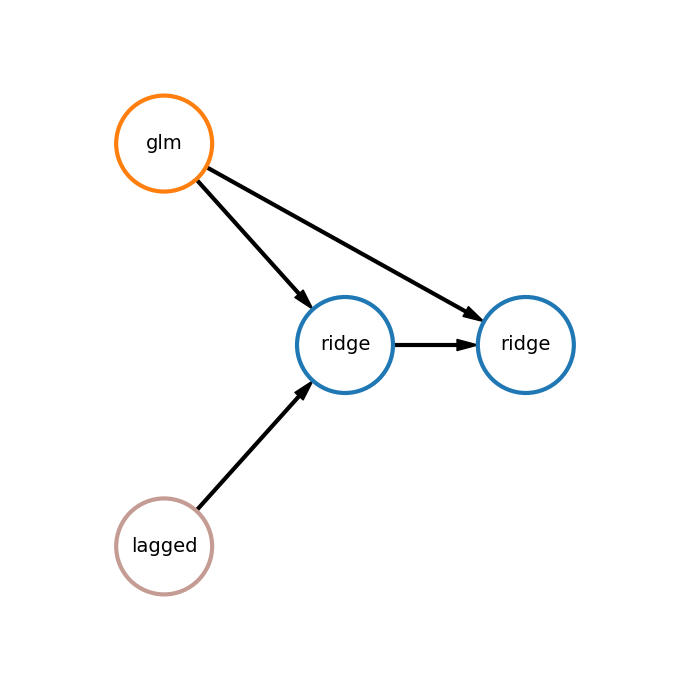

In [26]:
print_base_pipeline('M4_D3569')